# Modeling the Distance Fallen Under Gravity Using DEAP

*Simple exercise to familiarize yourself with DEAP*

You will complete specific parts of the code marked as # TODO.
You can draw inspiration from the guide provided.




## I- Design your first DEAP Program

In [22]:
%pip install deap


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Step 1: Import Libraries

In [23]:
# Title: Modeling a Physical Phenomenon Using Genetic Programming in DEAP

# Step 1: Import Libraries
import random
import operator
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from deap import base, creator, tools, gp

### Step 2: Generate Synthetic Data

In [24]:
# Step 2: Generate Synthetic Data
# We will generate data points for time ranging from 0 to 20 seconds
g = 9.81  # Acceleration due to gravity (m/s^2)
t_values = np.linspace(0, 20, 200)  # More points for a smoother curve
d_values = 0.5 * g * t_values**2  # Compute the distance fallen

# Create a DataFrame to handle data more easily
data = pd.DataFrame({'time': t_values, 'distance': d_values})

### Step 3: Define the Primitive Set

In [25]:
# Step 3: Define the Primitive Set
# TODO: Complete the creation of the Primitive Set
pset = gp.PrimitiveSet("MAIN", 1)  # One input variable (t)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)
#  TODO:  Add a random constant between -1 and 1
pset.addEphemeralConstant("rand1-1", lambda: random.uniform(-1, 1))
# TODO: Rename the input argument to 't'
pset.renameArguments(ARG0='t')


/Users/alexs/PycharmProjects/AppliedML2/.venv/lib/python3.11/site-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand1-1 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


### Step 4: Create the Fitness and Individual Classes

In [26]:
# Step 4: Create the Fitness and Individual Classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

/Users/alexs/PycharmProjects/AppliedML2/.venv/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/alexs/PycharmProjects/AppliedML2/.venv/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Step 5: Setup the DEAP Toolbox

In [27]:
# Step 5: Setup the DEAP Toolbox
toolbox = base.Toolbox()
# TODO: Register the expression generator using 'gp.genHalfAndHalf' with min and max values
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)


### Step 6: Define the fitness function

In [28]:
# Step 6: Define the fitness function
def evalSymbReg(individual):
    # Transform the tree expression into a callable function
    func = toolbox.compile(expr=individual)
    # Calculate Mean Squared Error between the predicted and actual distances
    sqerrors = ((func(t) - d)**2 for t, d in zip(data['time'], data['distance']))
    return math.fsum(sqerrors) / len(data),

### step 7: Register genetic operators in the toolbox

In [29]:
# Register genetic operators
# TODO: Register the crossover (cxOnePoint), mutation (mutUniform), selection (selTournamen with tournsize=3) and evaluation (evalSymbReg) functions
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalSymbReg)

# Step 8: Define the Evolutionary Algorithm

In [30]:
# Step 8: Define the Evolutionary Algorithm
def main():
    random.seed(42)
    # TODO: Create the initial population of size 300
    population = toolbox.population(n=300)
    ngen = 40  # Number of generations
    cxpb, mutpb = 0.5, 0.2  # Crossover and mutation probabilities

    # Track the best MSE values over generations
    mse_values = []

    # Evolutionary loop
    for gen in range(ngen):
        # Select and clone the next generation individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                #TODO: Apply the crossover operator to the children
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb:
                #TODO: Apply the mutation operator to the mutant
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate individuals with invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # TODO: Replace the old population with the offspring
        population[:] = offspring

        # Record the best MSE of this generation
        best_ind = tools.selBest(population, 1)[0]
        mse_values.append(toolbox.evaluate(best_ind)[0])
    # Plot MSE Over Generations
    plt.figure(figsize=(10, 5))
    plt.plot(range(ngen), mse_values, marker='o')
    plt.xlabel("Generation")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("MSE Over Generations")
    plt.grid()
    plt.show()

    # Return the best individual
    return tools.selBest(population, 1)[0]

 ### Step 10: run GP program

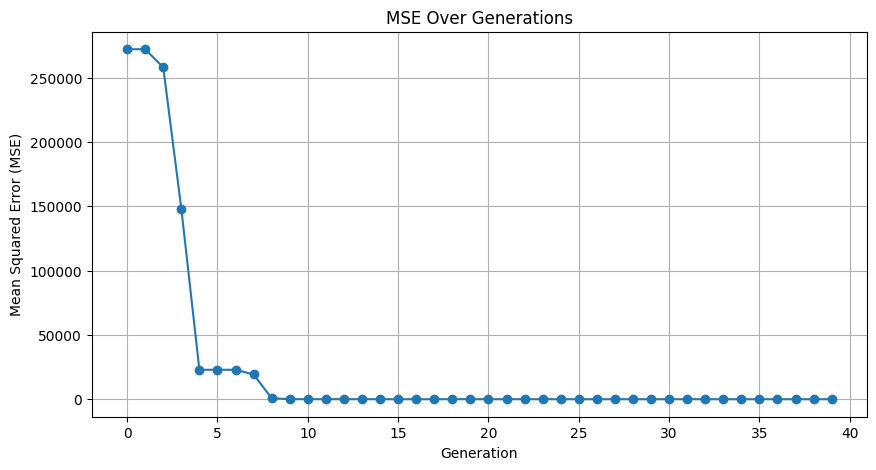

Best individual: add(add(mul(add(t, t), t), mul(sub(0.7083861398290552, t), 0.7081638565493862)), mul(add(add(t, sub(t, 0.7081638565493862)), t), t))
MSE: 16.987625300682872


In [31]:
# Step 10: Run the Main Function
# TODO: Execute the main function and store the best individual
best_individual = main()

#print best individual and its MSE
print(f'Best individual: {best_individual}')
print(f'MSE: {toolbox.evaluate(best_individual)[0]}')

### Step 11: Plot the best fit

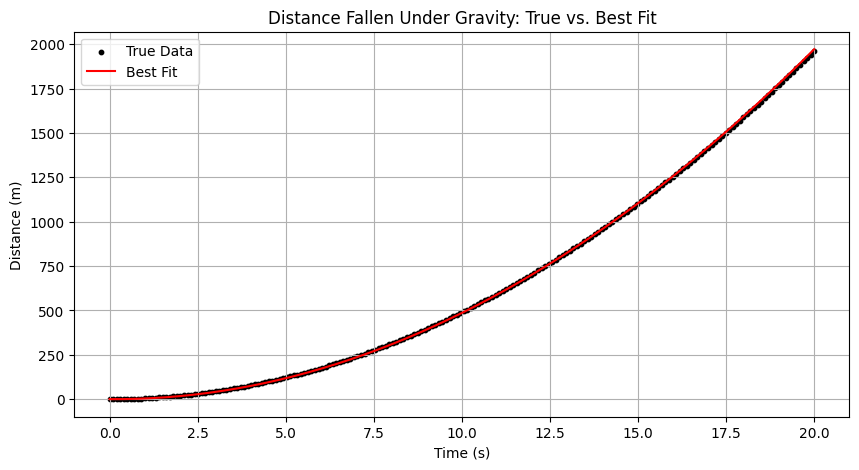

In [32]:
# Plot the best fit
best_func = toolbox.compile(expr=best_individual)
plt.figure(figsize=(10, 5))
plt.scatter(data['time'], data['distance'], label="True Data", color='black', s=10)
plt.plot(data['time'], [best_func(t) for t in data['time']], label="Best Fit", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Distance Fallen Under Gravity: True vs. Best Fit")
plt.legend()
plt.grid()
plt.show()




### Step 12: Answer the Questions
1. What kind of expressions did the genetic programming algorithm evolve?
2. How does the MSE change over generations? Is there a clear improvement trend?
3. What effect do you think the crossover and mutation probabilities had on the results?
4. Try adjusting the number of generations or the probabilities. What happens to the performance?

## II- Choosing a mutation operator
In DEAP (Distributed Evolutionary Algorithms in Python), several tree-based mutation operators can be used in genetic programming. These mutation operators manipulate the structure of the individual trees, which represent programs, in various ways. The available tree-based mutation operators in DEAP are:


1.   Uniform Mutation (gp.mutUniform)
Description: This operator selects a random node in the tree and replaces it with a newly generated subtree. The new subtree is created by randomly choosing an expression (a tree) with a depth bounded by the min_ and max_ parameters.
```
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
```
2.  Shrink Mutation (gp.mutShrink)
Description: The shrink mutation operator reduces the size of the tree by randomly selecting a node and replacing it with a subtree that has fewer nodes. This can result in a tree with fewer branches, potentially making the tree simpler.
```
toolbox.register("mutate", gp.mutShrink, pset=pset)
```
3. Node Mutation (gp.mutNodeReplacement)
Description: The mutNodeReplacement operator selects a random node in the tree and replaces it with an other node with the same number of arguments.
```
toolbox.register("mutate", gp.mutNodeReplacement, pset=pset)
```
4. Insert Mutation (pg.mutInsert)
Description: mutInsert inserts a new branch at a random position in *individual*. The subtree at the chosen position is used as child node of the created subtree, in that way, it is really an insertion rather than a replacement.
```
toolbox.register("mutate", gp.mutInsert, pset=pset)
```

### **TO DO**: Try different mutation operators

Try your GP program with different mutation operator (change the mutation operator in the toolbox as designed below).

**Find the implementations of the mutatuion operators at the end of the notebook.**

## III - Mutation and corssover probailities
In this exercise, we propose to study the effect of mutation and crossover probabilities on the performance of the model. To do this, we ask you to:
1. Define a function `run_experiment(cxpb, mutpb, ngen=40)` that takes as arguments the probabilities of mutation and crossover as well as the number of generations. This function replaces the main function in step 8 and it returns the MSE values.
2. Test the main function below with the proposed probability combinations.
3. What do you notice? What is the effect of these probabilities?
4. Test other combinations of probabilities

In [33]:
#TODO : define the function run_experiment
def run_experiment(cxpb, mutpb, ngen=40):
    random.seed(42)
    population = toolbox.population(n=300)
    mse_values = []

    for gen in range(ngen):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb: 
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring
        best_ind = tools.selBest(population, 1)[0]
        mse_values.append(toolbox.evaluate(best_ind)[0])
    return mse_values


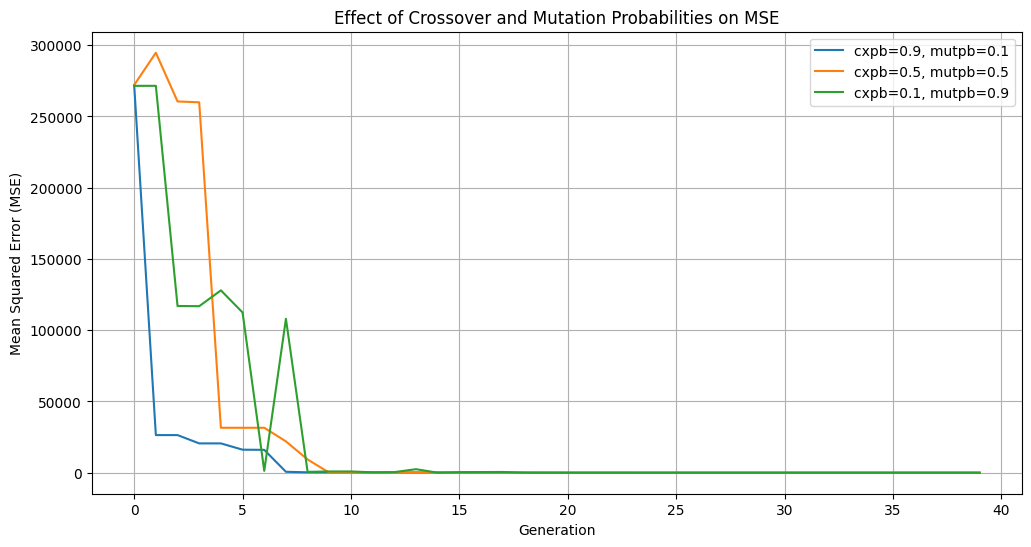

In [34]:
# Run Experiments with Different Probabilities
def main():
    ngen = 40
    # Different combinations of crossover and mutation probabilities
    probabilities = [
        (0.9, 0.1),  # High crossover, low mutation
        (0.5, 0.5),  # Balanced crossover and mutation
        (0.1, 0.9),  # Low crossover, high mutation
    ]

    plt.figure(figsize=(12, 6))

    for cxpb, mutpb in probabilities:
        mse_values = run_experiment(cxpb, mutpb, ngen)
        plt.plot(range(ngen), mse_values, label=f"cxpb={cxpb}, mutpb={mutpb}")

    plt.xlabel("Generation")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Effect of Crossover and Mutation Probabilities on MSE")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

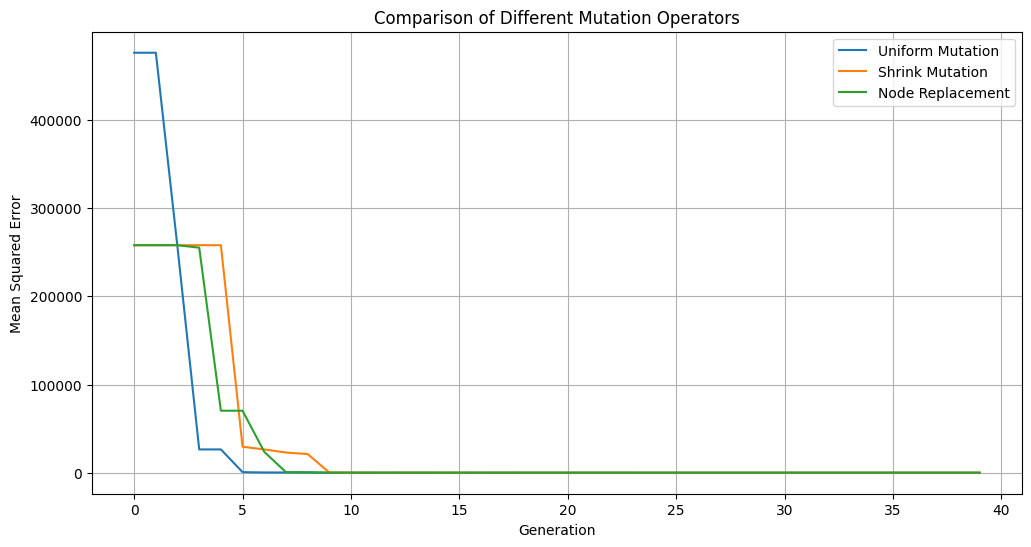

In [40]:
# First, add this import at the top with the other imports
from inspect import isclass

# 1. Uniform Mutation (default)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
mse_uniform = run_experiment(cxpb=0.7, mutpb=0.3)

# 2. Shrink Mutation
toolbox.register("mutate", gp.mutShrink)
mse_shrink = run_experiment(cxpb=0.7, mutpb=0.3)

# 3. Node Replacement Mutation
toolbox.register("mutate", gp.mutNodeReplacement, pset=pset)
mse_node = run_experiment(cxpb=0.7, mutpb=0.3)

# Plot results
plt.figure(figsize=(12, 6))
generations = range(40)
plt.plot(generations, mse_uniform, label='Uniform Mutation')
plt.plot(generations, mse_shrink, label='Shrink Mutation')
plt.plot(generations, mse_node, label='Node Replacement')
plt.xlabel('Generation')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Different Mutation Operators')
plt.legend()
plt.grid(True)
plt.show()